# Programming for Data Analysis Assignment 2020

Module: Programming For Data Analysis  
Student Name: John Kavanagh  
Lecturer: Brian McGinley 

The purpose of this assignment is to perform a dissection of the structure of the Numpy.Random package and to explain the interdependeencies of these sections through practical examples of code blocks as well as more practical plotting of graphs.

The areas to be reviewed and analysed are laid out as follows;

### Area for discussion

- Explain the overall purpose of the packag
- Explain the use of the simple random data function. 
- Explain the use of Permutations Funcitons. 
- Explain the use and purpose of at least five distributions functions. 
- Explain the use of seeds in generations pseudorandom numbers.


While there is an extensive amount of information available, and a large amount of research conducted in this area, the primary area of investigation will be conducted on the official Numpy Documentation catalogue listed [here](https://numpy.org/doc/stable/reference/random/index.html)

___

### Software Requirements

There are a number of pieces of software that are required in order to run this analysis. These are: 

1. Anaconda
2. Jupyter Notebook
3. Numpy
4. MatPlotLib



In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

___

Having reviewed the information that has been laid out in the question , as well as reviewing the information that has been laid out by the documentation from the Numpy site, the analysis will be given the following structure.

### Structure of the Analysis

#### Section 1 Overview of Numpy.Random
- Structure of the package
    - State & Seeding

#### Section 2 Review of Simple Random Data
- Four Key Areas of Simple Random Data

#### Section 3 Review of Permutations
- Permutations and Shuffle

#### Section 4 Leveraging Numpy.Random for Distrubtions
- Deep dive into distributiuons and implementation of plotting

#### Section 5 Conclusion
- Recap on Sections 1-3

#### Section 6 Bibliography
- Reference Material

___

### Section 1 Overview of Numpy.Random

#####  Structure of the Numpy.Random Package


The principle purpose of the package is random number generation, as per [Numpy.org](https://numpy.org/doc/stable/reference/random/index.html?highlight=numpy%20random#quick-start). Numpy, as per the latest edition of the package, has been updated to include several upgrades to the functions as well as a number of other settings in the package. Principle among these, is the introduction of the Permuted Congruential Generator 64 as the default pseudo random number generator. Otherwise known as PCG64, it supports the methods for how random number generation operates [Numpy.Org](https://numpy.org/doc/stable/reference/random/bit_generators/pcg64.html\0)


Within it's hierarchail structure, the numpy package is divided into two core parts, *BitGenerators* and *Generators*. 
We will be at first reviewing the Bitgenerator, via some sample code to demonstrate the packages capabilities.

The relationship between the BitGenerator and the Generator allows for random sampling to occur across numerous distributions.

##### BitGenerator

As per the official documentation on the [numpy.org](https://numpy.org/doc/stable/reference/random/bit_generators/generated/numpy.random.BitGenerator.html#numpy.random.BitGenerator) the BitGenerator performs a limited number of tasks within the numpy.random package but tasks that are crucial nonetheless. Amongst these though, is the management of the state as well as functions that will allow for random 32bit and 64bit values.

The BitGenerator is responsible for creating sequences for the package. These sequences are in turn used by the Generator to sample distrubitons that are being created by the user, such as a Zipf, Binomial and Gaussian distribution. These Distributions will be explained later on in the analysis under Section 4. 

The default BitGenerator for the most recent numpy package release is the PCG64. There are other BitGenerator's that can be called on, but, as indicated by the most recent release notes from Numpy, the PCG64 is the most powerful BitGenerator available to them. Should someone seek to reseed the BitGenerator to it's predecessor, the Mersenne Twister, it can be done so calling on it via the following documentation [Numpy.Org](https://numpy.org/doc/stable/reference/random/bit_generators/mt19937.html#numpy.random.MT19937)

For further information on the latest default BitGenerator, please review [here](https://numpy.org/doc/stable/reference/random/bit_generators/pcg64.html#numpy.random.PCG64)

###### State & Seeding
Now that we understand that the BitGenerator provides a stream of numbers, we need to understand, how seeds are used and facilitate the random number generationm otherwise known as pseudorandom numbers. In order for the BitGenerator to proudce random numbers, it needs to first have it's state initialised by a seed. This process is completed via a process called Seed-Sequence. <br>

Setting the seed, according to [StatisticsHowTo.com](https://www.statisticshowto.com/random-seed-definition/) is linked via the time in the machine that the random number is generated. It is because of this seed being set, that the start point of a number being generated is recorded.

Seed Sequence is responsible for setting this initial state. It completes this task, via a process of entropy, which can be reviewed via this [link](https://numpy.org/doc/1.19/reference/random/bit_generators/generated/numpy.random.SeedSequence.html#numpy.random.SeedSequence). It is because of this seed sequence process completing, that we can allow for the streams within the BitGenerator to be available.

Leveraging the numpy package, we can extract some basic information:

In [3]:
np.random.default_rng()

from numpy.random import Generator, PCG64, SeedSequence
sg = SeedSequence(1234)
rg = [Generator(PCG64(s)) for s in sg.spawn(10)]

In [11]:
np.random.default_rng()

Generator(PCG64) at 0x1FC77F4CA90

In the code above, we have initiated the sequence and have returned the BitGenerator that is active and capable of generating pseudo random numbers. This is the source for a BitGenerator test.
Source [numpy.org](https://numpy.org/doc/stable/reference/random/bit_generators/generated/numpy.random.BitGenerator.random_raw.html#numpy.random.BitGenerator.random_raw)<br> 

In order to initiate a new instance of a generator, we must use the following code as well as calling a method, to gather information on the distribution.

In [20]:
rng = np.random.default_rng()

In [21]:
vals = rng.standard_normal(10)
more_vals = rng.standard_normal(10)

In [22]:
from numpy.random import Generator, PCG64
rg = Generator(PCG64(127897895))
rg.standard_normal()

-0.455124928303646

In [23]:
# Test to see if there can be a random number generated across a standard distribution.

##### Generator



Following on from the BitGenerator, we have the second component of two components that comprosises the numpy.random high-level hierarchial view. 
The Generator is responsible for allowing access to Distributions as well as the Permutations that will be reviewed later in the text. 
According to [Numpy.org](https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.Generator)
, these distributions are called upon via methods / arguements that we will see throughout the text. 


In [25]:
np.random.default_rng()

Generator(PCG64) at 0x1FC77EE3B80

In [26]:
# The default_rng is a method that allows us to run a request on the BitGenerator

In [ ]:
# If we are to draw out the possibilities of these random numbers being generated, we can see them distributed below.

In [27]:
np.random.seed(50)

In [29]:
Scatter_Numbers = np.empty(1000)
for i in range(1000):
    Scatter_Numbers[i] = np.random.random()

(array([101., 101., 111., 103.,  98., 101.,  98.,  92.,  92., 103.]),
 array([0.00184416, 0.10162572, 0.20140729, 0.30118885, 0.40097042,
        0.50075198, 0.60053355, 0.70031511, 0.80009667, 0.89987824,
        0.9996598 ]),
 <BarContainer object of 10 artists>)

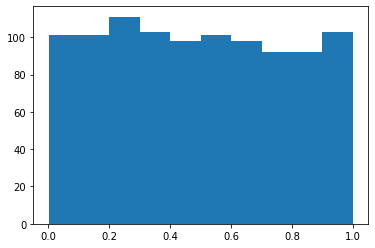

In [30]:
plt.hist(Scatter_Numbers)

In [31]:
# In the graph above, we have run a simple for loop in orer to generate a random number generation. 
# Above was replicated using code reproduced from [DataCamp](https://www.datacamp.com/community/tutorials/numpy-random) 

___

### Section 2 Review of Simple Random Data
#### Simple Random Data

We have seen from the structured nature of this package, that there are a  number of interdependencies in order for it to run successfully. Next, as part of our analysis into the package, we have the area of simple random data. 
There are four core sections to this section of the package. They are:  

1. Integers
2. Random
2. Choice
4. Bytes

Each section has it's own capabilities added to it to make it distinguishable from the last, as we will see in due course.

These can be reviewed more extensively from [Numpy.org](https://numpy.org/doc/stable/reference/random/generator.html)

> Side Note: NDArray is the concept of a multidimensional container for  items of the same size and type, according to [W3Cub](https://docs.w3cub.com/numpy~1.17/arrays.ndarray). They will be used throughout the exercise.  

In [ ]:
rng = np.random.default_rng()

We use the code in the text box above,  in order to best set ourselves up to test the code to follow. Whereby hte rng on the left hand side, stands for random number generator

##### 1.Integers 

Integers as a data type, being used within the numpy.random package. The same as a lot of other functions, the integer subsection of the random function package, is dependent on an understanding of its' parameters. i.e, what information we will place into the funciton in order to generate an output. 


Accoridng to [W3Cub](https://docs.w3cub.com/numpy~1.17/random/generated/numpy.random.generator.integers), we need to assess what we want to return, in order to understand what the inputs are going to be. 

In [35]:
rng.integers(0, 10, size=20)

array([8, 7, 8, 3, 9, 6, 4, 6, 0, 8, 3, 1, 2, 8, 3, 0, 6, 7, 6, 5],
      dtype=int64)

In [36]:
# an array of 20 numbers, excluding the higher bound of 10. 

In [37]:
x = rng.integers(0, 10, size=20)

In [38]:
# Take the infromaiton and re-produce it along side a variabel.

##### Plotting the data

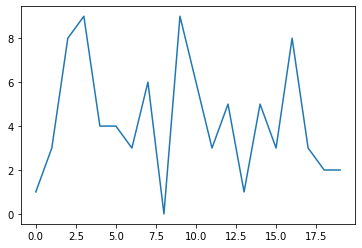

In [55]:
plt.plot(x)

In the code above, we can see that there are three parameters, that have been passed into the funciton.
Firstly, we have 'low' integer, this is the lowest starting point for what will be generated in the output. In this case it is 0. 

Next, we have the 'high' integer, which is 'exclusive'. This means that the random numbers generated will not take, in this instance, 10, into the output. 

Lastly, we have the third parameter, Size. In this context, relates to the number of random numbers to be generated in the ouput based on the limitations as set out in the low and exclusive integer parameters.


There's no real insight to be garnered from the graph, other than it being a picotral display of 20 numbers distributed across 0 - 9.

For further examples of this case, please review the [Numpy.org](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html#numpy.random.Generator.integers) site.

##### 2.Random

As true as it was for Integers, we're dependent upon the parameters, in order to extract the return from the Random Subsection. In this instance, the random funciton will allow for floating points to be taken into consideration. Floating points can be reviewed via clicking ont he following link, should you require more informaiton on them, via [TechTerms](https://techterms.com/definition/floatingpoint#:~:text=As%20the%20name%20implies%2C%20floating,decimal%20places%20are%20called%20integers.). 

The output of the random function will be an an integer between 0.0-1.0. What we produce inside the brackets, will be in relation to its' size. 
In teh example below we will create  a 7 x 3 matrix.

For further examples of this case, please review the [Numpy.org](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html#numpy.random.Generator.random)

In [40]:
type(rng.random())

float

In [ ]:
# The code above is a simple command on how to determine the datatype that is tolerated.

In [ ]:
# By way of example, create an array with seven rows and three columns, passing it through the random method.

In [41]:
rng.random((7,3))

array([[0.32662271, 0.59987822, 0.62316583],
       [0.96194706, 0.74869024, 0.28956486],
       [0.60622298, 0.9532146 , 0.40223592],
       [0.50768104, 0.99704732, 0.32266634],
       [0.76006714, 0.58513173, 0.73652897],
       [0.36940648, 0.4342768 , 0.87419098],
       [0.78964424, 0.390749  , 0.67164712]])

##### Plotting the data

Text(0, 0.5, 'Effort')

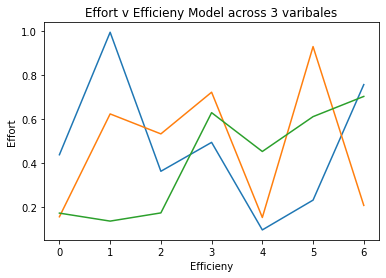

In [54]:
 b = rng.random((7,3))
plt.plot(b)
plt.title("Effort v Efficieny Model across 3 varibales")
plt.xlabel("Efficieny")
plt.ylabel("Effort")

In [ ]:
# The grpah above is a simple example of how numpy and matplotlib cohabitate.
# Please note that the information is for visual purposes only

According to [MatPlotLib](https://matplotlib.org/tutorials/text/text_intro.html), there are a number of resources that can be used to add greater levels of detail to our graphs.

##### 3.Choice

Choice has been created with the understanding of creating a single item, or an array for an output. What differentiates it from previous iterations of simple random data, is that we can code into the parameter an array, for its consideration. The package, however, will not take in an integer of negative value.  

For more information on the Choice subsection , please review the following link from [Numpy.org](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice)

According to [SharpSightLabs](https://www.sharpsightlabs.com/blog/numpy-random-choice/), there is also the parameter 'replacement' that can be developed upon. Replacement, according to this site, is the option to select the number generated again, as part of the overall selection.  

In [66]:
rng.choice(9, 5, replace=True)

array([2, 1, 8, 2, 2], dtype=int64)

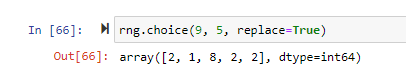

In [ ]:
# As above, proof of the replace arguement successfully working in the choice function.

In [67]:
# We have also mentioned that we can take into the function, a string. If we create a list of data type string, as follows

In [69]:
Cars_Manu = ['Audi', 'Seat', 'VW']
Bike_Manu = ['Fondriest', 'Campognolo', 'Liv', 'Giant']

In [70]:
rng.choice(Cars_Manu, 10)

array(['Seat', 'Seat', 'Seat', 'VW', 'VW', 'Audi', 'Audi', 'Seat', 'Audi',
       'VW'], dtype='<U4')

In [71]:
rng.choice(Bike_Manu, 10)

array(['Fondriest', 'Giant', 'Campognolo', 'Liv', 'Liv', 'Giant',
       'Campognolo', 'Campognolo', 'Liv', 'Liv'], dtype='<U10')

We can see from the array created above that there are multiple instances of the one manufactures name, in both instances, as the size of the array exceeds the parameters in the variable Cars_Manu.

##### 4.Bytes

The last of the four subsections within the Simple Data funciton, bytes, is used to return just that, bytes. 
The parameter for this snippet of code is limited to one, and that is length of type integer. 

By far, the most straight forward of the arguements to be called on, it is a matter of stipulating the lenght of the bytes you want to return.

For more information on this subsection, please review the link via [numpy.org](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.bytes.html#numpy.random.Generator.bytes)


In [72]:
rng.bytes(7)

b'\x85C%}<\x02V'

This is string of length 7, as hard coded into the line.

____

### Section 3 Review of Permutations



Within this segement of the package, we are going to be reviewing two types of order that we can put an array through. 

They are:
- Shuffle
- Permutations

In order to fully comprehend the following methods that are going to be applied to our numpy.random package, we need to know what to 'to permute' means. Simply put, it means to change the order of something, as per [Merriam Webster](https://www.merriam-webster.com/dictionary/permutate#:~:text=%3A%20change%2C%20interchange%20especially%20%3A%20to%20arrange%20in%20a%20different%20order). The purpose of these two arguements, is to augment the input into a differnt order. 

##### Shuffle

In order to shuffle a list of integers, we must set up our code to accept the integer, as follow.

For more information on this, please review [Numpy.org](https://numpy.org/doc/stable/reference/random/generated/numpy.random.shuffle.html#numpy.random.shuffle)

For further reading on the reshape function, please visit [here](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html#numpy.random.Generator.shuffle).

In [86]:
Shuf = np.arange(20)

In [87]:
# Set up a variable called Shuf which is a list of numbers up to, but excluding 20

In [88]:
np.random.shuffle(Shuf)

In [89]:
# we then take this variable, and apply the shuffle function to it.

In [90]:
Shuf

array([14, 18, 13,  4,  6,  1,  5, 16, 15,  7,  9, 19,  3,  2, 17,  0, 10,
       11,  8, 12])

We can see from the array that has been returned from the codeblock, that there are 20 integers in the array. You will also see that there is no number 20 in this list, as the list has commenced from the number 0.

In [91]:
Shuf = np.arange(18)
np.random.shuffle(Shuf)
Shuf

array([17,  3, 14, 13,  2,  6, 12, 16,  1, 11, 15,  9,  5, 10,  4,  7,  0,
        8])

Text(0, 0.5, 'Strength')

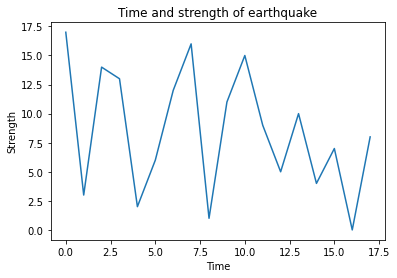

In [92]:
plt.plot(Shuf)
plt.title("Time and strength of earthquake")
plt.xlabel("Time")
plt.ylabel("Strength")

We can also add in the reshape funciton, so that we can create multiple arrays, based on the common denominators that comprise an integer. In the example displayed above, we have shuffled through the 18 numbers and will divide them into 6 seperate arrays, of 3 numbers each. This is only possible as 6 multiplied by 3 is equal to the number set out in the parameter.

In [95]:
Shuf = np.arange(18).reshape((6, 3))
np.random.shuffle(Shuf)
Shuf

array([[ 3,  4,  5],
       [ 9, 10, 11],
       [ 0,  1,  2],
       [ 6,  7,  8],
       [12, 13, 14],
       [15, 16, 17]])

Text(0, 0.5, 'Strength')

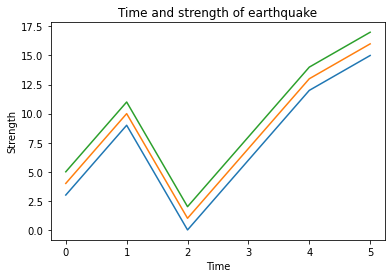

In [97]:
plt.plot(Shuf)
plt.title("Time and strength of earthquake")
plt.xlabel("Time")
plt.ylabel("Strength")

In [99]:
# Although the information above is stubbed information, randomly generated, from a visualisation perspective
# we can see that it allows for comparitive analysis

##### Permutations

Similar in its basis to shuffle, the permutations function will accept a integer as well as an array as a parameter. 

According to [StackOverflow](https://stackoverflow.com/questions/15474159/shuffle-vs-permute-numpy#:~:text=shuffle(x)%20can%20permute%20the,randomly%20along%20the%20first%20axis.&text=permutation(x)%20actually%20returns%20a,original%20data%20is%20not%20changed.) form a coding perspective, there is a difference between permutation and shuffle that needs to be adhered to and that "numpy.random.permutation(x) actually returns a new variable and the original data is not changed".


For more inforamtion on this topic, please review [Numpy.org](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html#numpy.random.Generator.permutation)

In [100]:
# If we take the basis for our analysis as: 
rng = np.random.default_rng()

In [101]:
# and we try to run through a permutation of an integer, 7. 
rng.permutation(7) 

array([2, 4, 5, 1, 6, 0, 3])

In [102]:
# we can also perform the permutation on an array [1, 2, 3, 4, 5, 6, 7]

In [103]:
rng.permutation([1, 2, 3, 4, 5, 6, 7])

array([4, 2, 7, 5, 3, 6, 1])

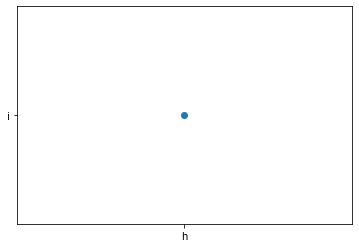

In [104]:
h = rng.permutation([1, 2, 3, 4, 5, 6, 7])
i = rng.permutation(50)

plt.scatter('h', 'i')

Similar in it's nature to that of shuffle

___

### Section 4 Leveraging Numpy.Random for Distrubtions

The objective of this exercise is to review at elast five different types of distribution.

The five types of distribution that we are going to review are: 

- Binomial
- Chi-Square
- Standard T
- Normal (Gaussian) Distribution
- Zipf


##### Binomial Distribution Overview

For more information [Numpy.org](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial)

Binomial distributuion refers to an event where there are two outcomes from the event. The most common example of a binomial distribtion is the toss of a coin. We can set up our analysis as follows:

In [ ]:
# number of trials
n = 100

In [ ]:
# Probability of event occuring
p = 0.5

In [ ]:
result = rng.binomial(n, p, 100)

In [ ]:
result

In [ ]:
# we can see fromt eh paramter above the number 100. This represents the number of times the trial occured. 
# That is, there were 10 tosses of a coin completed 100 times.

##### Plotting the data

In [ ]:
plt.hist(result, bins = 10, color = 'g')

##### Chi-Square Distribution Overview

This distribution test has been created in order to test the degrees of freedom. These degrees of freedom are measured via the sum of squared standard deviates of the distribution. 

For more information on this, please review [OnlineStatbook](http://onlinestatbook.com/2/chi_square/distribution.html). The code in the block below was retrieved from: [numpy.Org](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.chisquare.html#numpy.random.Generator.chisquare)

In [ ]:
rng.chisquare(12,3)

##### Plotting the data

In [ ]:
k = rng.chisquare(12,3)
plt.scatter(k)

###### Standard T 

Th Standard T sitribution devlops on in some ways from Ch-Square, in that it encompasses degrees of freedom. 
The T-Distribution, also refered to as the Student's T Distribution according to [Stat Trek](https://stattrek.com/probability-distributions/t-distribution.aspx). This distrubtiuon is briguht in when the sample isn't as large as would be expceted, whilst the variance is also unkonwn. 

> Side Note: "The derivation of the t-distribution was first published in 1908 by William Gosset while working for the Guinness Brewery in Dublin. Due to proprietary issues, he had to publish under a pseudonym, and so he used the name Student." as retrieved from [numpy.org](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.standard_t.html#numpy.random.Generator.standard_t) 

The t Score information can be retrieved from teh site [Numpy](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.standard_t.html#numpy.random.Generator.standard_t)

In [ ]:
Collection = np.array([123, 456, 789, 987, 654, 321])

In [ ]:
s = rng.standard_t(10, size=100000)

# where 10 is the degrees of freedom

In [ ]:
np.mean(Collection)

In [ ]:
Collection.std(ddof=1)

In [ ]:
t = (np.mean(Collection)-7725)/(Collection.std(ddof=1)/np.sqrt(len(Collection)))

#### Plotting The data

##### Normal (Gaussian) Distrubtion

The normal distrubtion is enacted when there is a need to observe a large array of information across a spectrum. These, when placed in a plot, are observed as a bell curve distribution. Such is ht eimportanc eof this bell curve distrubtion, to be viewed, we nbeed to ensure that we have access to the centre of the curve. i.e. Create a Mean and Standard Deviation.

For more information on the normal distrubtion [numpy.org](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal)

In [ ]:
a = 0

# this can be our mean

In [ ]:
b = 0.2

# this can be our standard deviation


In [ ]:
# Therefore

c = rng.normal(a, b, 100)

In [ ]:
# Validate mean and the variance 

abs(a - np.mean(c))

In [ ]:
abs(c - np.std(c, ddof = 1))

#### Plotting the data

##### Zipf Distribution

The Zipf distribtion is based around the principles of Zipf's Law, whereby the law states that: The Frequebcy of an item is inversely proportional to its rank  in a frequency table. 

For more information on the Zipf Distribution, please review [numpy.org](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.zipf.html#numpy.random.Generator.zipf)

In [ ]:
d = 4

In [ ]:
Zipf = rng.zipf(a, 1000)

#### Plotting the data     

___

### Section 5 Conclusion

___

### Section 6 Bibliography


Official Numpy site, November 2020
https://numpy.org/doc/stable/reference/random/index.html?highlight=numpy%20random#module-numpy.random


Markdown Style Guide, November 2020
https://www.markdownguide.org/basic-syntax/


Binomial Distribution 
https://www.datacamp.com/community/tutorials/probability-distributions-python


Explanantion of Tuple 
https://www.programiz.com/python-programming/tuple


Explanation of Chi-Square Rule
http://onlinestatbook.com/2/chi_square/distribution.html


Explanation of Students T Distribution
https://stattrek.com/probability-distributions/t-distribution.aspx

Explanation of where PCG64 originates
https://numpy.org/doc/stable/reference/random/bit_generators/pcg64.html

Datacamp.com
https://www.datacamp.com/community/tutorials/numpy-random

Techterms.Com
https://techterms.com/definition/floatingpoint#:~:text=As%20the%20name%20implies%2C%20floating,decimal%20places%20are%20called%20integers.

MatPlotLib - Legend
https://matplotlib.org/tutorials/intermediate/legend_guide.html
 
W3CUB - ND Array 
https://docs.w3cub.com/numpy~1.17/arrays.ndarray

SharpSight
https://www.sharpsightlabs.com/blog/numpy-random-choice/

Merriam Webster
https://www.merriam-webster.com/dictionary/permutate#:~:text=%3A%20change%2C%20interchange%20especially%20%3A%20to%20arrange%20in%20a%20different%20order

Stack Overflow - Permutaitons Function
https://stackoverflow.com/questions/15474159/shuffle-vs-permute-numpy#:~:text=shuffle(x)%20can%20permute%20the,randomly%20along%20the%20first%20axis.&text=permutation(x)%20actually%20returns%20a,original%20data%20is%20not%20changed.


